In [168]:
import pandas as pd
import numpy as np

In [169]:
from stldecompose import decompose

In [209]:
nottem = pd.read_csv('C:\\Users\\1465148\\Downloads\\nottem.csv', header = 0, parse_dates = [0], names = ['Month', 'Temp'], index_col = 0)

In [210]:
type(nottem)

pandas.core.frame.DataFrame

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


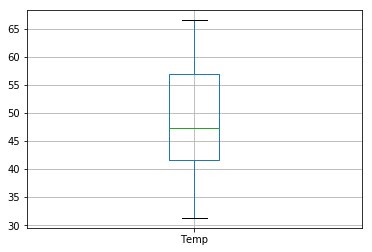

In [211]:
nottem["Temp"].plot.box(grid='True')

In [212]:
nottem.head()

,Temp
Month,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [213]:
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [214]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

In [215]:
nottem.count()

Temp    240
dtype: int64

In [216]:
# STL decomposition of nottem
stl = decompose(nottemts, period=12)
stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

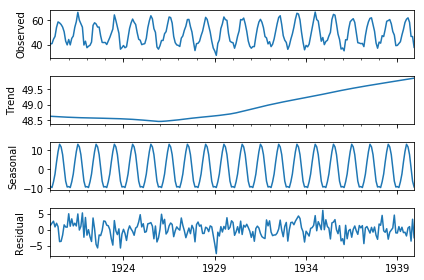

In [217]:
stlvisual = stl.plot()

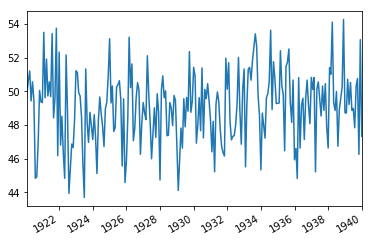

In [218]:
nottemts_without_season.plot()

In [219]:
nottemts_without_season = nottemts-stl.seasonal

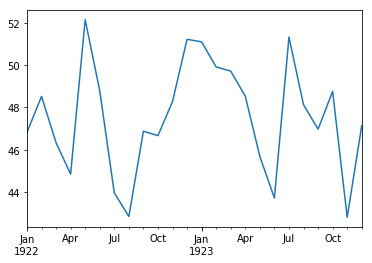

In [220]:
nottemts_without_season["1922-01-31":"1923-12-31"].plot()

In [221]:
nottemts_without_season.std()

2.2609267739607097

In [222]:
q1, q3= np.percentile(nottemts_without_season,[25,75])
print("q1 : ",q1,"q3 : ",q3)

q1 :  47.66028701985633 q3 :  50.46294465932146


In [223]:
iqr = q3 - q1
print("IQR : ",iqr)

IQR :  2.8026576394651315


In [224]:
lower_bound = q1 -(1.5 * iqr) 

In [225]:
lower_bound

43.45630056065863

In [226]:
upper_bound = q3 +(1.5 * iqr)

In [227]:
upper_bound 

54.66693111851916

In [228]:
nottemts_without_season[nottemts_without_season>upper_bound].count()

1

In [229]:
nottemts_without_season[nottemts_without_season<lower_bound].count()

3

In [230]:
Outliers=nottemts_without_season[(nottemts_without_season>upper_bound) | (nottemts_without_season<lower_bound)]

In [231]:
Outliers

1922-08-31    42.827637
1923-11-30    42.783068
1929-02-28    41.125809
1934-12-31    55.338484
dtype: float64

In [232]:
#nottemts_without_season.drop(nottemts_without_season[nottemts_without_season>upper_bound].index, inplace=True)

In [233]:
#nottemts_without_season.drop(nottemts_without_season[nottemts_without_season<lower_bound].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


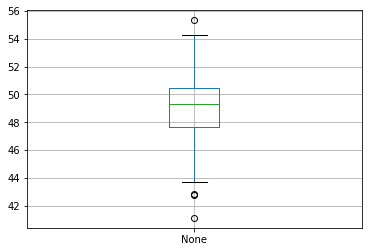

In [234]:
nottemts_without_season.plot.box(grid='True')

In [235]:
nottemts_without_season

1920-01-31    49.915659
1920-02-29    50.625809
1920-03-31    51.225960
1920-04-30    49.436345
1920-05-31    50.571729
1920-06-30    49.497091
1920-07-31    44.842452
1920-08-31    44.927637
1920-09-30    46.872821
1920-10-31    50.062945
1920-11-30    49.383068
1920-12-31    49.338484
1921-01-31    53.515659
1921-02-28    49.625809
1921-03-31    51.925960
1921-04-30    49.736345
1921-05-31    50.571729
1921-06-30    49.697091
1921-07-31    53.442452
1921-08-31    48.427637
1921-09-30    49.572821
1921-10-31    53.762945
1921-11-30    46.183068
1921-12-31    52.338484
1922-01-31    46.815659
1922-02-28    48.525809
1922-03-31    46.325960
1922-04-30    44.836345
1922-05-31    52.171729
1922-06-30    48.797091
                ...    
1937-07-31    48.542452
1937-08-31    50.327637
1937-09-30    48.872821
1937-10-31    50.462945
1937-11-30    47.883068
1937-12-31    46.638484
1938-01-31    51.415659
1938-02-28    51.025809
1938-03-31    54.125960
1938-04-30    49.336345
1938-05-31    48

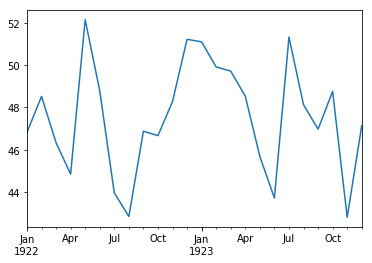

In [236]:
nottemts_without_season["1922-01-31":"1923-12-31"].plot(use_index=True)


In [237]:
nottemts

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
1920-06-30    58.5
1920-07-31    57.7
1920-08-31    56.4
1920-09-30    54.3
1920-10-31    50.5
1920-11-30    42.9
1920-12-31    39.8
1921-01-31    44.2
1921-02-28    39.8
1921-03-31    45.1
1921-04-30    47.0
1921-05-31    54.1
1921-06-30    58.7
1921-07-31    66.3
1921-08-31    59.9
1921-09-30    57.0
1921-10-31    54.2
1921-11-30    39.7
1921-12-31    42.8
1922-01-31    37.5
1922-02-28    38.7
1922-03-31    39.5
1922-04-30    42.1
1922-05-31    55.7
1922-06-30    57.8
              ... 
1937-07-31    61.4
1937-08-31    61.8
1937-09-30    56.3
1937-10-31    50.9
1937-11-30    41.4
1937-12-31    37.1
1938-01-31    42.1
1938-02-28    41.2
1938-03-31    47.3
1938-04-30    46.6
1938-05-31    52.4
1938-06-30    59.0
1938-07-31    59.6
1938-08-31    60.4
1938-09-30    57.0
1938-10-31    50.7
1938-11-30    47.8
1938-12-31    39.2
1939-01-31    39.4
1939-02-28    40.9
1939-03-31    42.4
1939-04-30  

In [238]:
Outliers

1922-08-31    42.827637
1923-11-30    42.783068
1929-02-28    41.125809
1934-12-31    55.338484
dtype: float64

In [239]:
import matplotlib.pyplot as plt

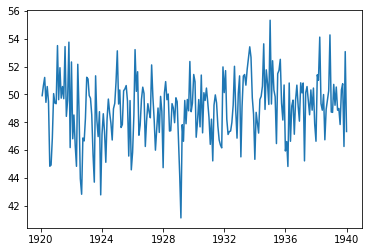

In [245]:
plt.plot(nottemts_without_season)

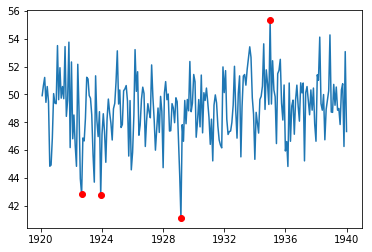

In [244]:
plt.plot(nottemts_without_season)
plt.plot(Outliers,'ro')